In [30]:
import time
from datetime import datetime, date, time, timedelta
import dateutil.relativedelta
import pandas as pd
import numpy as np

# Suppressing scientific notation
np.set_printoptions(suppress=True)

RetailSales=pd.read_csv('C:/Users/RIDDHIMA/Desktop/Retail_Database.csv')
RetailSales.head(20)

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,01/03/2016,16000,1,0,0,0,91
1,786743,Product_1825,Whse_S,Category_006,01/03/2016,50000,1,0,0,0,85
2,786967,Product_0551,Whse_S,Category_030,01/03/2016,3000,1,0,0,0,85
3,786856,Product_0556,Whse_S,Category_030,01/03/2016,1000,1,0,0,0,93
4,899538,Product_1844,Whse_A,Category_018,01/03/2016,7,1,0,0,0,95
5,786726,Product_0470,Whse_S,Category_005,01/03/2016,2000,1,0,0,0,80
6,899733,Product_0643,Whse_A,Category_028,01/03/2016,2,1,0,0,0,85
7,899398,Product_0650,Whse_A,Category_022,01/03/2016,300,1,0,0,0,88
8,786806,Product_1429,Whse_S,Category_019,01/03/2016,3000,1,0,0,0,95
9,899734,Product_0982,Whse_A,Category_028,01/03/2016,5000,1,0,0,0,92


In [24]:
RetailSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169211 entries, 0 to 169210
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product_id        169211 non-null  int64 
 1   Product_Code      169211 non-null  object
 2   Warehouse         169211 non-null  object
 3   Product_Category  169211 non-null  object
 4   Date              169211 non-null  object
 5   Order_Demand      169211 non-null  int64 
 6   Open              169211 non-null  int64 
 7   Promo             169211 non-null  int64 
 8   StateHoliday      169211 non-null  object
 9   SchoolHoliday     169211 non-null  int64 
 10  Petrol_price      169211 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 14.2+ MB


In [33]:
RetailSales['Date']=pd.to_datetime(RetailSales['Date'])

In [34]:
def Function_get_month(inpDate):
    return(inpDate.month)

# Function to get Year from a date
def Function_get_year(inpDate):
    return(inpDate.year)


# Creating new columns
RetailSales['Month']=RetailSales['Date'].apply(Function_get_month)
RetailSales['Year']=RetailSales['Date'].apply(Function_get_year)

RetailSales.head()

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price,Month,Year
0,786725,Product_0033,Whse_S,Category_005,2016-01-03,16000,1,0,0,0,91,1,2016
1,786743,Product_1825,Whse_S,Category_006,2016-01-03,50000,1,0,0,0,85,1,2016
2,786967,Product_0551,Whse_S,Category_030,2016-01-03,3000,1,0,0,0,85,1,2016
3,786856,Product_0556,Whse_S,Category_030,2016-01-03,1000,1,0,0,0,93,1,2016
4,899538,Product_1844,Whse_A,Category_018,2016-01-03,7,1,0,0,0,95,1,2016


In [35]:
pd.crosstab(columns=RetailSales['Month'],
            index=RetailSales['Year'],
            values=RetailSales['Order_Demand'],
            aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11
Year,,,,,,,,,,,
2016,78627619,74065041,93303910,79503364,80299593,84553011,88439936,80471772,77698896,84000757,67075433


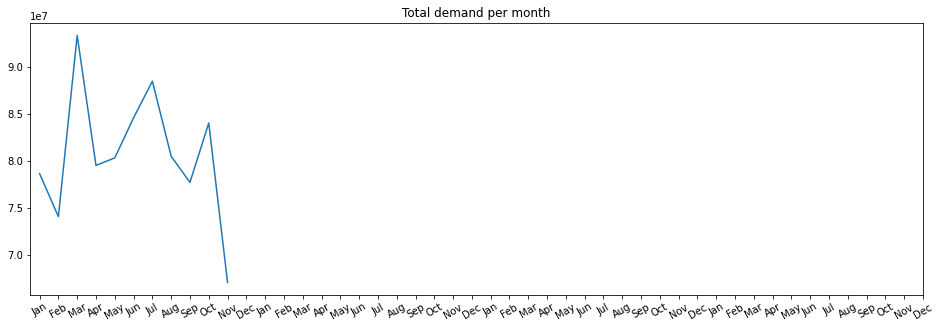

In [38]:
import matplotlib.pyplot as plt
DEMAND=pd.crosstab(columns=RetailSales['Year'],
            index=RetailSales['Month'],
            values=RetailSales['Order_Demand'],
            aggfunc='sum').melt()['value']

MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

# Plotting the sales
%matplotlib inline
DEMAND.plot(kind='line', figsize=(16,5), title='Total demand per month')
# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=30) 

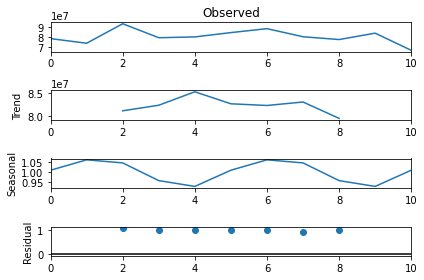

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = DEMAND.values
result = seasonal_decompose(series, model='multiplicative', freq=5)
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)
result.plot()
CurrentFig=plt.gcf()

plt.show()

Next Twelve Months Demand Forecast: 12    6.475736e+07
13    6.593557e+07
14    6.716999e+07
15    6.614998e+07
16    6.520045e+07
17    6.638682e+07
18    6.607513e+07
19    6.575000e+07
20    6.601858e+07
21    6.626860e+07
22    6.595621e+07
23    6.603828e+07
Name: Forecast, dtype: float64
#### Accuracy of model: 86.24 ####


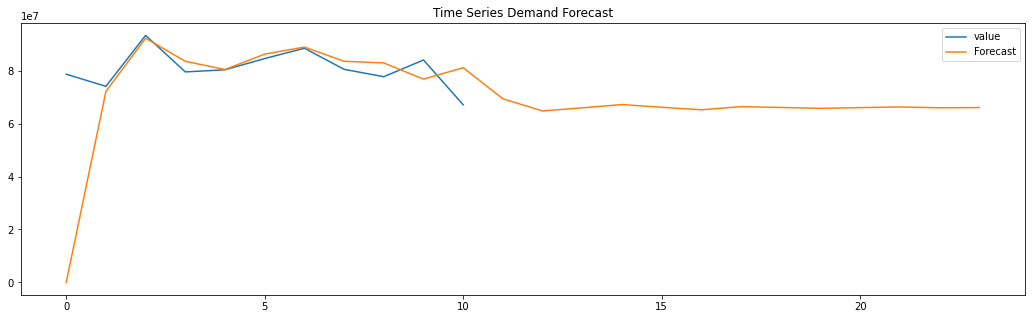

In [48]:
# Importing the algorithm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')


# Train the model on the full dataset 
SarimaxModel = SARIMAX(DEMAND,  
                        order = (1, 1, 5),  
                        seasonal_order =(1, 0, 0, 5))
SalesModel = SarimaxModel.fit()
  
# Forecast for the next 12 months
forecast = SalesModel.predict(start = 0,
                          end = (len(DEMAND)) + 12,
                          typ = 'levels').rename('Forecast')
print("Next Twelve Months Demand Forecast:",forecast[-12:])

# Plot the forecast values
DEMAND.plot(figsize = (18, 5), legend = True, title='Time Series Demand Forecast')
forecast.plot(legend = True, figsize=(18,5))

# Measuring the accuracy of the model
MAPE=np.mean(abs(DEMAND-forecast)/DEMAND)*100
print('#### Accuracy of model:', round(100-MAPE,2), '####')

